In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os

In [38]:
from util import RESOURCE_DIR
type_characterization = ['database.xlsx', 'implementation.xlsx', 'implementation_names.xlsx', 'query.xlsx', 'count_implementation_rate.xlsx', 'count_sql.xlsx']
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[1]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
len(df)
df.head()

,Projects,Domains,mybatis,jOOQ,Spring,JPA,JDBC,Hibernate,EclipseLink
0,Activiti,automation,1,0,1,1,0,1,0
1,airbyte,infrastructure management,0,1,0,0,0,0,0
2,airsonic,media,1,0,0,0,0,0,1
3,spring-cloud-alibaba,infrastructure management,0,0,1,0,0,1,0
4,nacos,infrastructure management,1,0,0,0,0,0,0


In [3]:
data_with_index = df.set_index("Projects")
#data_with_index = data_with_index.drop(["ethereumj", "openhab1-addons", "openhab2-addons", "Silence", "docker-client", "riot-android", "zalenium"])
data_with_index = data_with_index.drop(columns='JPA')
data_with_index.head()

,Domains,mybatis,jOOQ,Spring,JDBC,Hibernate,EclipseLink
Projects,,,,,,,
Activiti,automation,1,0,1,0,1,0
airbyte,infrastructure management,0,1,0,0,0,0
airsonic,media,1,0,0,0,0,1
spring-cloud-alibaba,infrastructure management,0,0,1,0,1,0
nacos,infrastructure management,1,0,0,0,0,0


In [4]:
data_jpa = df[["Projects", "Domains", "JPA"]].copy()
data_jpa.iloc[: , 2:].sum().sort_values(ascending=False)

JPA    67
dtype: int64

In [5]:
data_with_index.iloc[: , 1:].sum().sort_values(ascending=False)

mybatis        155
Hibernate       94
Spring          45
EclipseLink     14
jOOQ             7
JDBC             0
dtype: int64

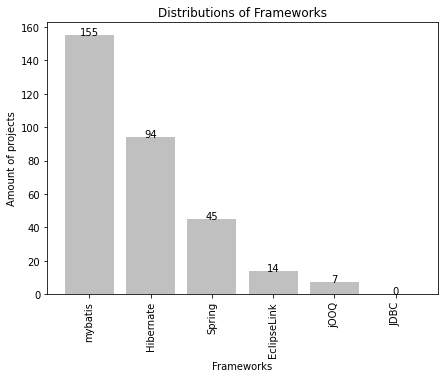

In [6]:
plt.figure(figsize=(7,5))

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center') #

df = data_with_index.iloc[: , 1:].sum().sort_values(ascending=False)
plt.bar(df.index, df.values, color='silver')
addlabels(df.index, df.values)
plt.xticks(rotation=90)

plt.title("Distributions of Frameworks")
plt.xlabel("Frameworks")
plt.ylabel("Amount of projects")
plt.show() 

In [4]:
from util import USAGE_FAN_IN_FILE
df = pd.read_excel(USAGE_FAN_IN_FILE, engine = 'openpyxl')
df.head()
#data_with_index = df.set_index("Projects")
#data_with_index = data_with_index.drop(["ethereumj", "openhab1-addons", "openhab2-addons", "Silence", "docker-client", "riot-android", "zalenium"])
#data_with_index.reset_index(inplace=True)

,Projects,DB-Code(Java),DB-Code(Java) Rate,DB-Code(XML),DB-Code(XML) Rate,Dependencies,Dependencies Rate,Total-DB,Total-Project,Rate
0,Activiti,14.0,0.287356,62.0,1.272578,14.0,0.287356,9.0,4872,1.847296
1,airbyte,35.0,0.567771,NaN,NaN,37.0,0.599482,72.0,6172,1.166559
2,airsonic,1.0,0.651466,2.0,0.132932,NaN,NaN,3.0,1535,0.195440
3,spring-cloud-alibaba,NaN,NaN,3.0,0.465116,NaN,NaN,3.0,645,0.465116
4,nacos,1.0,0.515730,3.0,0.154719,2.0,0.131460,6.0,1939,0.394379


In [5]:
data_with_index = df.iloc[: , :].sort_values(by='Total-DB', ascending=False)
data_with_index.head()

,Projects,DB-Code(Java),DB-Code(Java) Rate,DB-Code(XML),DB-Code(XML) Rate,Dependencies,Dependencies Rate,Total-DB,Total-Project,Rate
89,ebean,34.0,0.886823,NaN,NaN,862.0,22.483464,896.0,3834,23.369849
291,onedev,146.0,3.864479,2.0,0.529386,53.0,14.285865,678.0,3778,17.946318
42,netbeans,125.0,0.151383,NaN,NaN,5525.0,6.691132,565.0,82572,6.842513
313,wildfly,196.0,1.375825,1.0,0.719514,337.0,2.365576,534.0,14246,3.748427
40,ambari,164.0,1.647413,1.0,0.145230,324.0,3.254646,489.0,9955,4.912145


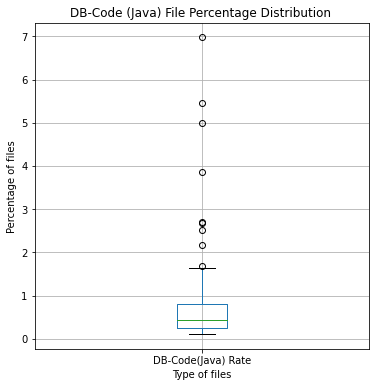

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize =(6, 6))
stud_bplt = df.boxplot(column=['DB-Code(Java) Rate'])

stud_bplt.plot()
plt.title("DB-Code (Java) File Percentage Distribution ")
plt.xlabel("Type of files")
plt.ylabel("Percentage of files")
plt.show()

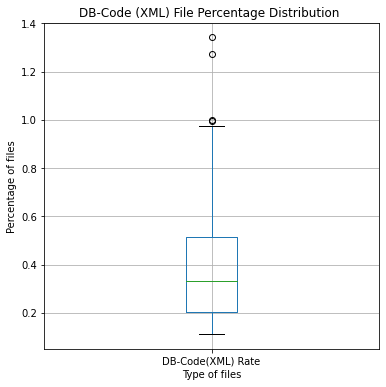

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize =(6, 6))
stud_bplt = df.boxplot(column=['DB-Code(XML) Rate'])

stud_bplt.plot()
plt.title("DB-Code (XML) File Percentage Distribution ")
plt.xlabel("Type of files")
plt.ylabel("Percentage of files")
plt.show()

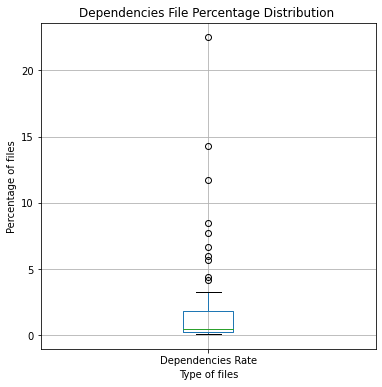

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize =(6, 6))
stud_bplt = df.boxplot(column=['Dependencies Rate'])

stud_bplt.plot()
plt.title("Dependencies File Percentage Distribution ")
plt.xlabel("Type of files")
plt.ylabel("Percentage of files")
plt.show()

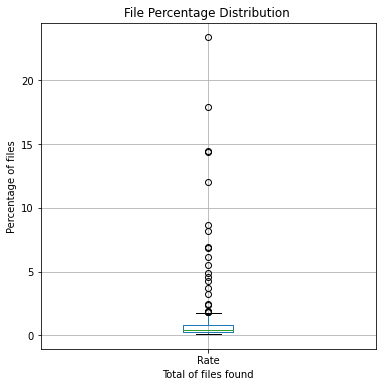

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize =(6, 6))
stud_bplt = df.boxplot(column=['Rate'])

stud_bplt.plot()
plt.title("File Percentage Distribution ")
plt.xlabel("Total of files found")
plt.ylabel("Percentage of files")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize =(13, 6))
stud_bplt = df.boxplot(column=['DB-Code(Java) Rate', 'DB-Code(XML) Rate', 'Dependencies Rate', 'Rate'])

stud_bplt.plot()
plt.title("Distribution of files")
plt.show()

In [11]:
from apyori import apriori

rules = apriori(data_with_index, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2)

results = list(rules)
results = pd.DataFrame(results)
results.head(5)

,items,support,ordered_statistics
0,"((, ))",0.285714,"[(((), ()), 1.0, 3.5), (()), ((), 1.0, 3.5)]"
1,"(C, ()",0.285714,"[(((), (C), 1.0, 3.5), ((C), ((), 1.0, 3.5)]"
2,"(J, ()",0.142857,"[(((), (J), 0.5, 3.5), ((J), ((), 1.0, 3.5)]"
3,"(L, ()",0.142857,"[(((), (L), 0.5, 3.5), ((L), ((), 1.0, 3.5)]"
4,"(M, ()",0.142857,"[(((), (M), 0.5, 3.5), ((M), ((), 1.0, 3.5)]"


In [12]:
from mlxtend.frequent_patterns import apriori, association_rules

CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[1]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
df = df.iloc[: , 2:]

frq_items = apriori(df, min_support = 0.01, use_colnames = True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values('lift', ascending =False)
rules = rules[rules['consequents'].apply(lambda x: len(x)) == 1]
rules[rules['antecedents'] == {'JPA'}]


/home/fredlinux/.pyenv/versions/3.7.9/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:115: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
18,(JPA),(EclipseLink),0.208075,0.043478,0.034161,0.164179,3.776119,0.025115,1.144410
11,(JPA),(Spring),0.208075,0.139752,0.065217,0.313433,2.242786,0.036139,1.252971
17,(JPA),(Hibernate),0.208075,0.291925,0.121118,0.582090,1.993966,0.060376,1.694321
2,(JPA),(mybatis),0.208075,0.481366,0.158385,0.761194,1.581319,0.058225,2.171778


In [42]:
USAGE_FAN_IN_FILE_PATH = RESOURCE_DIR + os.sep + "usage_fan_in_file.xlsx"
df_usage_fan_in = pd.read_excel(USAGE_FAN_IN_FILE_PATH, engine = 'openpyxl')

CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[2]
implementation = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')

implementation_usage = pd.merge(implementation, df_usage_fan_in, how = 'inner', on = 'Projects')
implementation_usage = implementation_usage.drop(columns=['Domains', 'DB-Code(Java)', 'DB-Code(XML)', 'Dependencies', 'Total-DB', 'Total-Project' ])
implementation_usage.head()

,Projects,mybatis,jOOQ,Spring,JPA,JDBC,Hibernate,EclipseLink,DB-Code(Java) Rate,DB-Code(XML) Rate,Dependencies Rate,Rate
0,Activiti,mybatis,NaN,Spring,JPA,NaN,Hibernate,NaN,0.287356,1.272578,0.287356,1.847296
1,airbyte,NaN,jOOQ,NaN,NaN,NaN,NaN,NaN,0.567771,NaN,0.599482,1.166559
2,airsonic,mybatis,NaN,NaN,NaN,NaN,NaN,EclipseLink,0.651466,0.132932,NaN,0.195440
3,spring-cloud-alibaba,NaN,NaN,Spring,NaN,NaN,Hibernate,NaN,NaN,0.465116,NaN,0.465116
4,nacos,mybatis,NaN,NaN,NaN,NaN,NaN,NaN,0.515730,0.154719,0.131460,0.394379


In [43]:
#implementation_usage = implementation_usage.drop(columns='Projects')

new_frameworks_list = []
new_frameworks_list_string = []

frameworks_list = implementation_usage.iloc[: , 2:7].values.tolist()  

for i in frameworks_list:
    new_frameworks_list_not_null = [x for x in i if pd.isnull(x) == False]
    new_frameworks_list_string = '/'.join([str(item) for item in new_frameworks_list_not_null])
    new_frameworks_list.append(new_frameworks_list_string)

df_implementation_usage = implementation_usage.iloc[: , 8:]
df_implementation_usage = df_implementation_usage.assign(ListFrameworks = new_frameworks_list)

#print(df_implementation_usage)

df_group_implementation_usage = df_implementation_usage.groupby('ListFrameworks')['Rate'].apply(list).reset_index(name='NumberDBFiles')

df_group_implementation_usage.head()

,ListFrameworks,NumberDBFiles
0,,"[0.195439739, 0.39437855, nan, nan, nan, nan, ..."
1,Hibernate,"[nan, nan, nan, nan, nan, 0.58224163, nan, nan..."
2,JPA,"[0.99991, nan, 0.1935193, nan, 0.4216867, 0.45..."
3,JPA/Hibernate,"[0.236779795, 0.13786448, 0.23386342, 8.695652..."
4,Spring,"[0.951625694, nan, 0.65616798, 0.32743942, 8.1..."


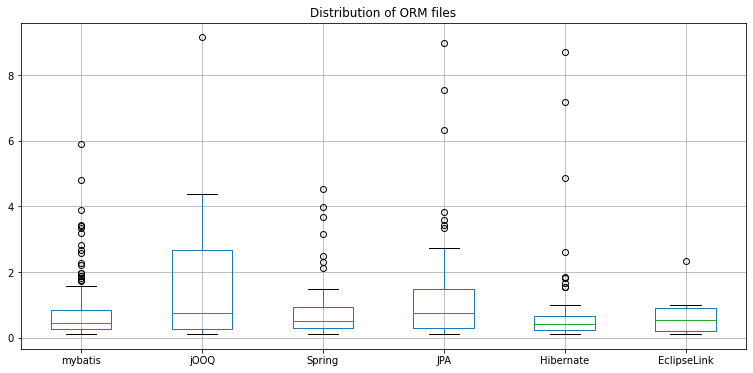

In [44]:
import matplotlib.pyplot as plt

CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[4]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')

plt.figure(figsize =(13, 6))
stud_bplt = df.boxplot(column=['mybatis', 'jOOQ', 'Spring', 'JPA', 'Hibernate', 'EclipseLink']);
stud_bplt.plot()
plt.title("Distribution of ORM files")
plt.show()



In [20]:
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[3]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
df.rename(columns = {'(Ignore, SQL)':'SQL'}, inplace = True)
df.head()

,Projects,Domains,Builder,"(IgnoreCase, SQL)"
0,Activiti,automation,1,1
1,airbyte,infrastructure management,1,1
2,airsonic,media,1,1
3,spring-cloud-alibaba,infrastructure management,1,1
4,nacos,infrastructure management,1,1


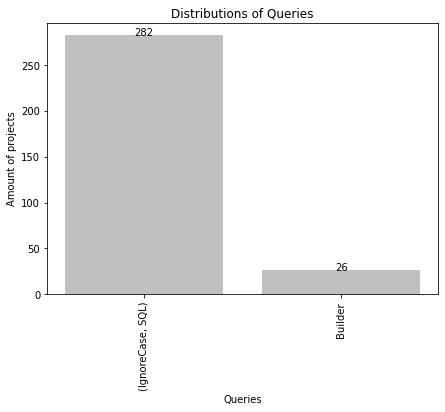

In [10]:
plt.figure(figsize=(7,5))

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center') #

df = df.iloc[: , 2:].sum().sort_values(ascending=False)
plt.bar(df.index, df.values, color='silver')
addlabels(df.index, df.values)
plt.xticks(rotation=90)

plt.title("Distributions of Queries")
plt.xlabel("Queries")
plt.ylabel("Amount of projects")
plt.show()

In [18]:
df.loc[:,'SumPerProject'] = df.sum(axis=1)
df.rename(columns = {'(IgnoreCase, SQL)':'SQL'}, inplace = True)
df_count_2 = df[df.SumPerProject == 2].count()
print(df_count_2)
df_count_sql = df[df.SQL ==1].count()
print(df_count_sql)
df_count_builder = df[df.Builder == 1].count()
print(df_count_builder)
df_count_0 = df[df.SumPerProject == 0].count()
print(df_count_0)

Projects         26
Domains          26
Builder          26
SQL              26
SumPerProject    26
dtype: int64
Projects         282
Domains          282
Builder          282
SQL              282
SumPerProject    282
dtype: int64
Projects         26
Domains          26
Builder          26
SQL              26
SumPerProject    26
dtype: int64
Projects         40
Domains          40
Builder          40
SQL              40
SumPerProject    40
dtype: int64


/home/fredlinux/.pyenv/versions/3.7.9/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Type of file', ylabel='total'>

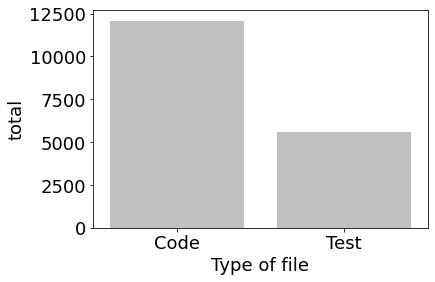

In [22]:
import seaborn as sns

number_of_files = pd.read_excel('../resources/number_of_files.xlsx')

total_code_files = number_of_files['Code'].sum()
total_test_files = number_of_files['Test'].sum()

dados = {
    'Type of file': ['Code', 'Test'],
    'total': [total_code_files, total_test_files]
}

dados = pd.DataFrame(dados)

sns.barplot(x = 'Type of file', y = 'total', data = dados, color = 'silver')

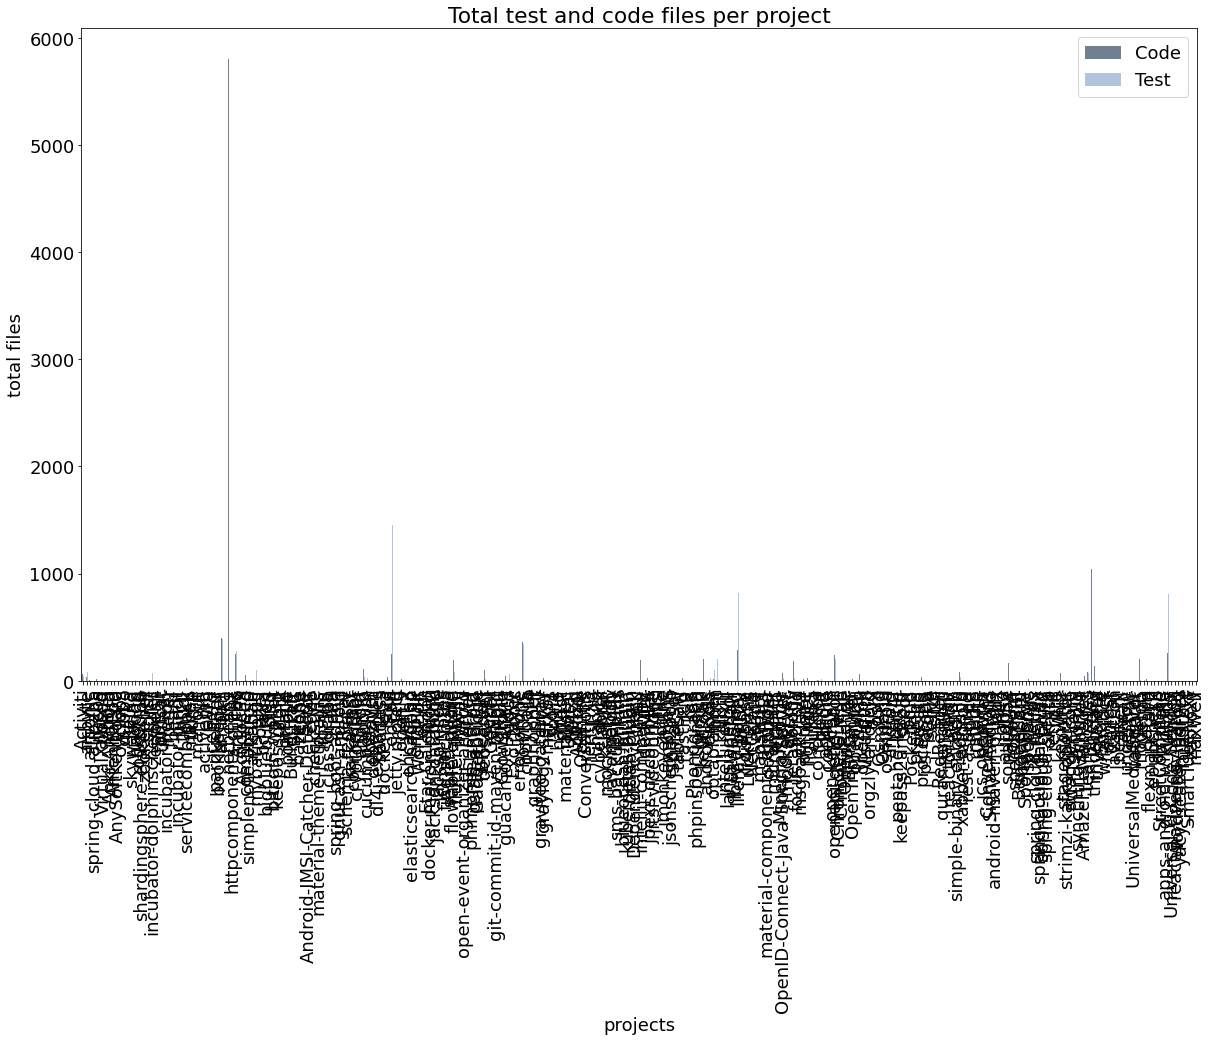

In [15]:
type_of_files  = number_of_files[['Project', 'Code', 'Test']]
type_of_files = type_of_files.set_index('Project')

type_of_files.iloc[0:].plot(kind='bar', title="Total test and code files per project", color = ['slategrey', 'lightsteelblue'])
plt.xlabel("projects")
plt.ylabel("total files")
plt.rcParams.update({'font.size': 18})
plt.gcf().set_size_inches(20, 12)